<a href="https://colab.research.google.com/github/TruongThanhNhan20146382/Nhan20146382/blob/main/AI_W11_14_4_23_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(x_train,y_train), (x_test, y_test)=fashion_mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=x_train.reshape(60000,28,28,1)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,28,28,1)
x_test=x_test.astype('float32')/255
from keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense,Dropout, Flatten,Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='Softmax'))

In [ ]:
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])


In [ ]:
train=model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
938/938 [==============================] - 4s 4ms/step - loss: 0.4384 - accuracy: 0.8392
Epoch 2/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2750 - accuracy: 0.8979
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2295 - accuracy: 0.9166
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1992 - accuracy: 0.9267
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1748 - accuracy: 0.9347
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1525 - accuracy: 0.9427
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1310 - accuracy: 0.9516
Epoch 8/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1135 - accuracy: 0.9573
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0962 - accuracy: 0.9646
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0836 - accuracy: 0.9685

Test loss: 0.5090348124504089
Test accuracy: 0.9135000109672546


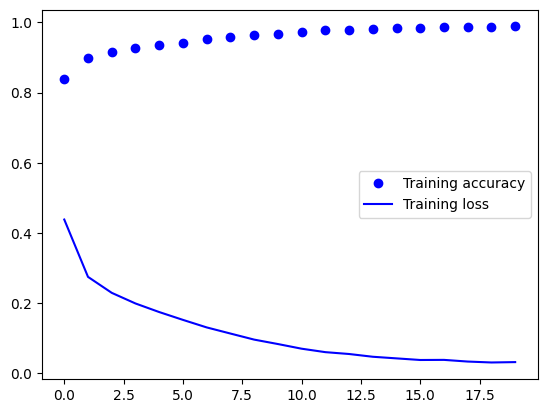

In [ ]:
import matplotlib.pyplot as plt
test=model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',test[0])
print('Test accuracy:',test[1])
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,loss,'b', label='Training loss')
plt.legend()
plt.show()